In [45]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from IPython.display import HTML
import matplotlib.animation as anim
import plotly.graph_objects as go

import hj_reachability as hj

load trajectory and grid dimensions


In [46]:
data = scipy.io.loadmat('data.mat')
xr = data['xr'].flatten() 
yr = data['yr'].flatten() 
grid_size = data['grid_size']
l =  np.array(data["grid_min"]).flatten()
u = np.array(data["grid_max"]).flatten()
print(grid_size)



[[13 13 13 12 21]]


In [47]:
grid = hj.Grid.from_lattice_parameters_and_boundary_conditions(hj.sets.Box(l,
                                                                           u),
                                                               (13,13,13,12,21),
                                                               periodic_dims=2)

In [48]:
V = data["value_function"]
Vmy = data["mydata"]
target_values = V[:,:,:,:,:,-1]
Mytarget_values = Vmy[:,:,:,:,:,-1]

<Figure size 640x480 with 0 Axes>

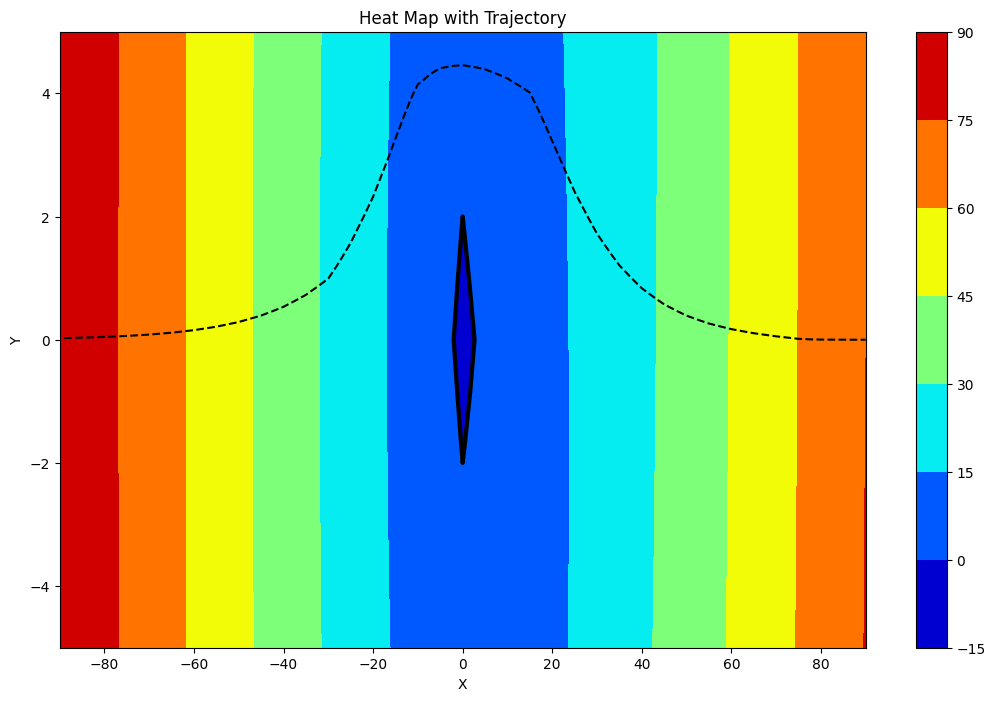

In [49]:
plt.jet()
plt.figure(figsize=(13, 8))

# Plot the heat map
plt.contourf(grid.coordinate_vectors[0], grid.coordinate_vectors[1], Mytarget_values[:, :, 0,8,5].T)
plt.colorbar()

# Plot the contour line
plt.contour(grid.coordinate_vectors[0],
            grid.coordinate_vectors[1],
            Mytarget_values[:, :, 0,8,5].T,
            levels=0,
            colors="black",
            linewidths=3)

# Plot the trajectory
plt.plot(xr[::-1], yr[::-1], 'k--')
##print(xr[::-1])
##print(target_values[0,-4,0,0,0])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heat Map with Trajectory')
plt.show()